In [49]:
# sets the cells width of current notebook 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import torch
import torch.nn as nn
torch.set_printoptions(edgeitems=30, linewidth=100000)

In [2]:
from dlc_practical_prologue import generate_pair_sets

nSamples = 1000
data = generate_pair_sets(nSamples)
var_names = ["train_input", "train_target", "train_classes", "test_input", "test_target", "test_classes"]
train_input, train_target, train_classes, test_input, test_target, test_classes = data
stringWidth = 20
for i, el in enumerate(list(map(lambda x: (x.shape, x.dtype), data))):
    print('{:s}  {:s}  {:s}'.format(
        var_names[i].ljust(stringWidth),
        ' x '.join(list(map(lambda x: str(x), list(el[0])))).center(stringWidth), 
        'dtype'.ljust(stringWidth)))

train_input            1000 x 2 x 14 x 14   dtype               
train_target                  1000          dtype               
train_classes               1000 x 2        dtype               
test_input             1000 x 2 x 14 x 14   dtype               
test_target                   1000          dtype               
test_classes                1000 x 2        dtype               


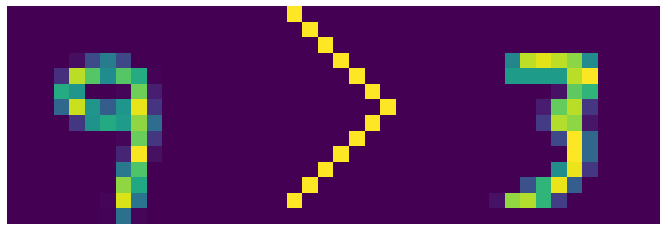

In [2]:
from utils import show_pair

show_pair(train_input, train_target, 0)

## Without using the information from the classes

In [3]:
from utils import train_model
from models.net1 import Net1

model = Net1()
criterion = nn.BCEWithLogitsLoss()
eta = 1e-3
mini_batch_size = 100
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model(model, train_input, train_target.float(), test_input, test_target, nb_epochs, mini_batch_size, optimizer, criterion)

/home/relja/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:145: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(


Epoch 0: loss 8.856 / train accuracy 76.6%, test accuracy 73.4
Epoch 1: loss 5.409 / train accuracy 79.4%, test accuracy 77.0
Epoch 2: loss 4.251 / train accuracy 82.0%, test accuracy 80.4
Epoch 3: loss 3.957 / train accuracy 85.1%, test accuracy 80.4
Epoch 4: loss 3.340 / train accuracy 88.5%, test accuracy 82.4
Epoch 5: loss 2.984 / train accuracy 90.5%, test accuracy 83.0
Epoch 6: loss 2.520 / train accuracy 91.9%, test accuracy 83.4
Epoch 7: loss 2.316 / train accuracy 92.9%, test accuracy 82.7
Epoch 8: loss 1.908 / train accuracy 95.0%, test accuracy 84.0
Epoch 9: loss 1.694 / train accuracy 97.2%, test accuracy 83.1


In [4]:
from utils import num_of_train_param
num_of_train_param(model)

The model has 24425 trainable parameters


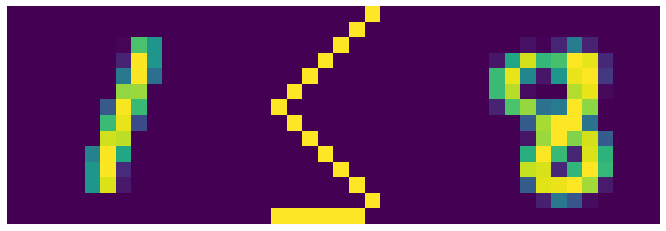

In [14]:
predictions = model(test_input)
show_pair(test_input, predictions, 10)

## With class information during training

In [5]:
from utils import train_model_double_objective
from models.net2 import Net2

model = Net2()
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10
        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 339.568 / train accuracy 79.4%, test accuracy 75.0
Epoch 1: loss 145.611 / train accuracy 85.1%, test accuracy 80.4
Epoch 2: loss 105.327 / train accuracy 86.7%, test accuracy 83.4
Epoch 3: loss 86.724 / train accuracy 90.2%, test accuracy 86.0
Epoch 4: loss 62.295 / train accuracy 91.5%, test accuracy 86.8
Epoch 5: loss 62.337 / train accuracy 93.3%, test accuracy 88.8
Epoch 6: loss 49.523 / train accuracy 93.6%, test accuracy 88.9
Epoch 7: loss 50.271 / train accuracy 93.0%, test accuracy 88.2
Epoch 8: loss 35.405 / train accuracy 96.1%, test accuracy 90.1
Epoch 9: loss 35.985 / train accuracy 96.5%, test accuracy 89.8


In [6]:
from utils import accuracy_of_digit_class
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 93.90


## Net2 with pretrained digit classifier

In [5]:
from models.digit_classifier import DigitClassifier
import torch
from torch import nn
from utils import train_model

mini_batch_size = 100
model_classifier = DigitClassifier(out_h = 10, subnet = False)

optimizer = torch.optim.Adam(model_classifier.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
train_in = train_input[:, 0, :, :].unsqueeze(axis = 1)
train_class = train_classes[:,0]
test_in = test_input[:, 0, :, :].unsqueeze(axis = 1)
test_class = test_classes[:,0]

train_model(model = model_classifier, 
            train_input = train_in, train_target = train_class,
            test_input = test_in, test_target = test_class,
            nb_epochs = 20, mini_batch_size = 100, 
            optimizer = optimizer, criterion = criterion,
            verbose = True)

Epoch 0: loss 27.917 / train accuracy 32.8%, test accuracy 29.0
Epoch 1: loss 17.779 / train accuracy 55.6%, test accuracy 53.2
Epoch 2: loss 12.619 / train accuracy 73.7%, test accuracy 70.2
Epoch 3: loss 9.301 / train accuracy 80.3%, test accuracy 78.8
Epoch 4: loss 7.022 / train accuracy 85.0%, test accuracy 83.6
Epoch 5: loss 5.431 / train accuracy 86.7%, test accuracy 84.6
Epoch 6: loss 4.527 / train accuracy 92.2%, test accuracy 88.6
Epoch 7: loss 3.857 / train accuracy 94.5%, test accuracy 90.5
Epoch 8: loss 2.836 / train accuracy 94.9%, test accuracy 90.2
Epoch 9: loss 2.274 / train accuracy 95.8%, test accuracy 91.9
Epoch 10: loss 1.933 / train accuracy 97.3%, test accuracy 93.5
Epoch 11: loss 1.556 / train accuracy 97.8%, test accuracy 92.8
Epoch 12: loss 1.314 / train accuracy 98.6%, test accuracy 93.6
Epoch 13: loss 1.029 / train accuracy 99.1%, test accuracy 93.2
Epoch 14: loss 0.923 / train accuracy 99.4%, test accuracy 92.8
Epoch 15: loss 0.678 / train accuracy 99.5%, te

In [3]:
from utils import train_model_double_objective
from utils import dfs_freeze
from models.net2 import Net2

dfs_freeze(model_classifier)
model = Net2(model_classifier)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=eta)
nb_epochs = 10
        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 176.738 / train accuracy 62.8%, test accuracy 64.5
Epoch 1: loss 132.376 / train accuracy 72.3%, test accuracy 72.6
Epoch 2: loss 116.140 / train accuracy 77.2%, test accuracy 78.8
Epoch 3: loss 98.076 / train accuracy 80.6%, test accuracy 82.2
Epoch 4: loss 91.530 / train accuracy 82.7%, test accuracy 82.8
Epoch 5: loss 93.823 / train accuracy 83.1%, test accuracy 83.9
Epoch 6: loss 89.465 / train accuracy 82.8%, test accuracy 83.1
Epoch 7: loss 91.276 / train accuracy 83.2%, test accuracy 83.7
Epoch 8: loss 89.468 / train accuracy 83.0%, test accuracy 82.7
Epoch 9: loss 88.721 / train accuracy 83.0%, test accuracy 83.6


In [4]:
from utils import accuracy_of_digit_class
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 91.80


In [5]:
from utils import num_of_train_param
num_of_train_param(model)

The model has 11 trainable parameters


## Simple convolutional network

In [6]:
from models.convnet import ConvNet
from utils import train_model

model = ConvNet(nb_channels=48, kernel_size=3, weight_sharing=False)
criterion = nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
nb_epochs = 20
mini_batch_size = 100

# input size is 16 x 16 (power of 2, so that it can be run through 3 max-pool layers)
train_model(model, 
            torch.nn.functional.pad(train_input, (1, 1, 1, 1), 'constant', 0), train_target.float(),
            torch.nn.functional.pad(test_input, (1, 1, 1, 1), 'constant', 0), test_target,
            nb_epochs, mini_batch_size,
            optimizer, criterion)

Epoch 0: loss 6.615 / train accuracy 76.2%, test accuracy 73.7
Epoch 1: loss 4.910 / train accuracy 82.0%, test accuracy 77.1
Epoch 2: loss 3.676 / train accuracy 89.1%, test accuracy 79.9
Epoch 3: loss 2.404 / train accuracy 93.4%, test accuracy 80.1
Epoch 4: loss 1.213 / train accuracy 95.8%, test accuracy 80.5
Epoch 5: loss 0.485 / train accuracy 97.8%, test accuracy 80.5
Epoch 6: loss 0.939 / train accuracy 82.0%, test accuracy 70.0
Epoch 7: loss 0.864 / train accuracy 98.3%, test accuracy 80.7
Epoch 8: loss 0.313 / train accuracy 99.8%, test accuracy 80.9
Epoch 9: loss 0.342 / train accuracy 95.5%, test accuracy 77.2
Epoch 10: loss 0.455 / train accuracy 99.6%, test accuracy 79.1
Epoch 11: loss 0.469 / train accuracy 94.4%, test accuracy 75.0
Epoch 12: loss 0.197 / train accuracy 99.7%, test accuracy 81.3
Epoch 13: loss 0.089 / train accuracy 99.5%, test accuracy 82.3
Epoch 14: loss 0.040 / train accuracy 100.0%, test accuracy 79.7
Epoch 15: loss 0.022 / train accuracy 100.0%, tes

In [7]:
from utils import num_of_train_param
num_of_train_param(model)

The model has 117265 trainable parameters
